<a href="https://colab.research.google.com/github/aladbukky/Data-Science-Projects-at-SAIL/blob/main/Covid19_Statistical_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Project - Nigeria Covid19 Statistical Inference

This group exercise requires the team to the following:

Summarize the covid-19 data by regions

*   Summarize the covid-19 data by region
*   Test each region against others to test if their average death number from
    covid-19 is the same.
*   Present our tests as Data Scientists

In [4]:
install.packages("tidyverse")
install.packages("dplyr")
library(tidyverse)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
#load the covid-19 data set
#The source data does have the region column. The data was therefore preprocessed to include the regions of each state using excel vlookup function
nigeria_states_by_region <- read.csv("/content/covid19_nigeria_statesNEW.csv")
head(nigeria_states_by_region, 10)

,X,states,region,total_confirmed,new_confirmed,total_recoveries,new_recoveries,total_death,new_death,week,day,month
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,1,Abia,South East,2121,77,2010,8,33,2,26/12/2021,Sunday,December
2,2,Adamawa,North East,1157,0,1098,0,32,0,26/12/2021,Sunday,December
3,3,Akwa Ibom,South South,4487,59,4349,31,44,0,26/12/2021,Sunday,December
4,4,Anambra,South East,2489,43,2405,19,19,0,26/12/2021,Sunday,December
5,5,Bauchi,North East,1851,25,1791,15,23,0,26/12/2021,Sunday,December
6,6,Bayelsa,South South,1290,4,1226,10,28,0,26/12/2021,Sunday,December
7,7,Benue,North Central,1907,0,1512,0,25,0,26/12/2021,Sunday,December
8,8,Borno,North East,1532,176,1317,0,38,0,26/12/2021,Sunday,December
9,9,Cross River,South South,696,6,654,23,25,0,26/12/2021,Sunday,December


In [11]:
#convert the region column into a factor
nigeria_states_by_region$region <- as.factor(nigeria_states_by_region$region)


In [12]:
# Perform ANOVA test to compare the average number of deaths across regions
anova_result_region <- aov(total_death ~ region, data = nigeria_states_by_region)
anova_result_region
summary(anova_result_region)

Call:
   aov(formula = total_death ~ region, data = nigeria_states_by_region)

Terms:
                  region Residuals
Sum of Squares   1784844  16040467
Deg. of Freedom        5      4094

Residual standard error: 62.59427
Estimated effects may be unbalanced

              Df   Sum Sq Mean Sq F value Pr(>F)    
region         5  1784844  356969   91.11 <2e-16 ***
Residuals   4094 16040467    3918                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [13]:
# Perform Tukey HSD post-hoc test
tukey_result_region <- TukeyHSD(anova_result_region)
tukey_result_region

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = total_death ~ region, data = nigeria_states_by_region)

$region
                                diff        lwr        upr     p adj
North East-North Central   -9.527422 -18.703069 -0.3517747 0.0364894
North West-North Central   -2.706732 -11.862528  6.4490629 0.9594480
South East-North Central  -11.004358 -20.677018 -1.3316968 0.0150863
South South-North Central  19.727311  10.535595 28.9190260 0.0000000
South West-North Central   49.242540  40.156139 58.3289406 0.0000000
North West-North East       6.820689  -2.992132 16.6335112 0.3529755
South East-North East      -1.476936 -11.773695  8.8198234 0.9985386
South South-North East     29.254732  19.408387 39.1010777 0.0000000
South West-North East      58.769962  49.021856 68.5180673 0.0000000
South East-North West      -8.297625 -18.576698  1.9814475 0.1935479
South South-North West     22.434043  12.606195 32.2618913 0.0000000
South West-No

The result above show the difference of the mean of the deaths by the regions being compared. It also shows the P-value results, that indicates if the difference are statistically significant.

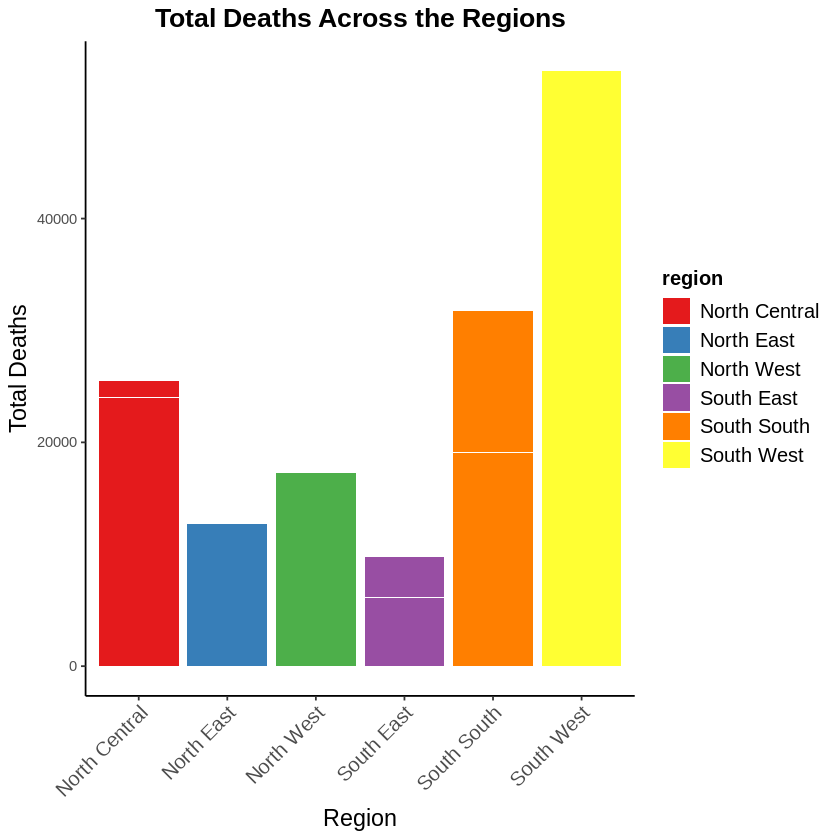

In [18]:
# Visualize the total deaths by region
region_deaths <- ggplot(nigeria_states_by_region, aes(x = region, y = total_death, fill = region)) +
  geom_col() +
  labs(title = "Total Deaths Across the Regions", x = "Region", y = "Total Deaths") +
  theme_classic() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 12)
  ) +
  scale_fill_brewer(palette = "Set1")
region_deaths

As seen from the above plot, the South west has the highest death toll, followed by the South South region.
The region with the lowest death toll is South East.

#Conclusion

Our null hypothesis states that the the average death number from covid19 across the region is the same.
Based on the result of the Tukey HSD post-hoc test, the following conclusions can be drawn;

1) In comparing these regions;

    North East-North Central,
    South East-North Central,  
    South South-North Central,  
    South West-North Central,   
    South South-North East,     
    South West-North East,      
    South South-North West,     
    South West-North West,      
    South South-South East,     
    South West-South East,      
    South West-South South,     
  At 0.05 significance level, we reject the null hypothesis that the average number of deaths across these regions is the same, meaning there is a significant difference in the average number of deaths between this compared region.  This conclusion is drawn from the fact the the P-value result is lower than 0.05.

2) For these regions;

    North West-North Central,
    North West-North East,
    South East-North East and
    South East-North West
    
  We fail to reject the null hypothesis. This implies that there is no statistically significant difference in the average number of deaths from COVID-19 between these compared regions at 0.05 significance level.